In [13]:
# import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

In [16]:
# train_values = pd.read_csv( 'train_values.csv', index_col='building_id')
# train_labels = pd.read_csv( 'train_labels.csv', index_col='building_id')
cleaned_train_labels = pd.read_csv( '../cleaned_train.csv')
cleaned_train_labels

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,False,False,False,False,False,False,False,False,False,False
1,28830,2,8,900,2812,2,10,8,7,o,...,False,False,False,False,False,False,False,False,False,False
2,94947,3,21,363,8973,2,10,5,5,t,...,False,False,False,False,False,False,False,False,False,False
3,590882,2,22,418,10694,2,10,6,5,t,...,False,False,False,False,False,False,False,False,False,False
4,201944,3,11,131,1488,3,30,8,9,t,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,25,1335,1621,1,55,6,3,n,...,False,False,False,False,False,False,False,False,False,False
260597,669485,3,17,715,2060,2,0,6,5,t,...,False,False,False,False,False,False,False,False,False,False
260598,602512,3,17,51,8163,3,55,6,7,t,...,False,False,False,False,False,False,False,False,False,False
260599,151409,2,26,39,1851,2,10,14,6,t,...,False,False,False,False,False,False,False,False,False,False


In [6]:
cols = cleaned_train_labels.columns.tolist()
cols =  cols[:] + cols[1:2] 
cols.remove("damage_grade")
cleaned_train_labels = cleaned_train_labels[cols] 
#  pd.get_dummies(dataset, columns = [
one_hot = pd.get_dummies(cleaned_train_labels)
one_hot

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,True,True,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,False,True,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,False,True,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,False,True,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,True,False,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,False,True,...,0,0,0,1,0,0,0,0,1,0
260597,669485,17,715,2060,2,0,6,5,False,True,...,0,0,0,0,0,0,0,0,1,0
260598,602512,17,51,8163,3,55,6,7,False,True,...,0,0,0,0,0,0,0,0,1,0
260599,151409,26,39,1851,2,10,14,6,False,False,...,0,0,0,0,0,0,0,0,1,0


In [7]:
ke = [0,1,2,3,4]
ke[1:2]

[1]

In [68]:
# atributos, a_predecir = one_hot.iloc[:,:-1], cleaned_train_labels.iloc[:,-1]
atributos = cleaned_train_labels[['geo_level_1_id','geo_level_2_id', 'geo_level_3_id']].values
a_predecir = cleaned_train_labels['damage_grade'].values


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(atributos, a_predecir, test_size=0.2, random_state=123)
X_train

array([[    0,  1274,  4190],
       [   10,  1207, 12014],
       [   17,   944,  8232],
       ...,
       [    8,   463,  4692],
       [    8,   600,   157],
       [   17,   229,  4027]])

In [71]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [72]:
preds = rf_model.predict(X_test)
f1_score(y_test, preds, average='micro') 


0.7118819669614933

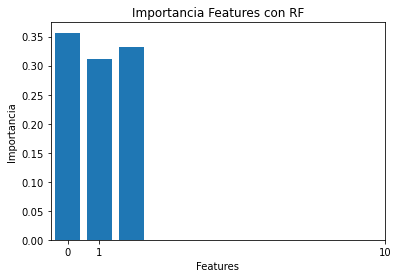

In [74]:
rf_model.feature_importances_.tolist()
pd.DataFrame(X_train)
plt.bar(pd.DataFrame(X_train).columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.xticks([0,1,10])
plt.show()